## Final Assignment Applied Statistics Milk Quality Statistical Analysis and Prediction using Logistic Regression

In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sn                   # For plotting graphs
import statsmodels.api as sm

In [2]:
milk_df = pd.read_csv("milknew.csv")

In [3]:
milk_df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
milk_df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [5]:
milk_df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
milk_df.Grade.unique()

array(['high', 'low', 'medium'], dtype=object)

In [7]:
# Mapping using map function
milk_df['Grade'] = milk_df.Grade.map({'low':0, 'medium':1, 'high':2})

In [8]:
milk_df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [9]:
milk_df.shape

(1059, 8)

In [10]:
milk_df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade           int64
dtype: object

In [11]:
milk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [12]:
milk_df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [14]:
# Duplicate Values in the dataset:
milk_df.duplicated().sum()

976

In [15]:
milk_df.loc[milk_df.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,2
48,9.5,34,1,1,0,1,255,0
50,6.6,37,1,1,1,1,255,2
51,5.5,45,1,0,1,1,250,0
52,4.5,60,0,1,1,1,250,0
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2


In [13]:
milk_df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


## Exploratory Data Analysis


## Univariate Analysis:

In [16]:
milk_df['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


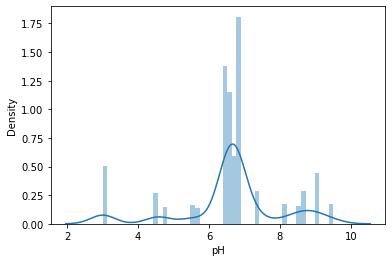

In [17]:
sns.distplot(milk_df['pH'])
plt.show()

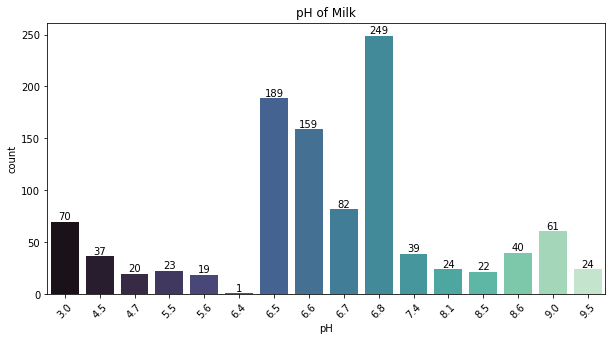

In [21]:
plt.figure(figsize=(10,5))
plt.title("pH of Milk",fontsize=12)
c1=sns.countplot(x='pH',data=milk_df,palette="mako")
c1.bar_label(c1.containers[0],size=10)
plt.xticks(rotation=45)
plt.show()

## Majority of the milk have pH less than 7 indicating that milk is slightly acidic in nature.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


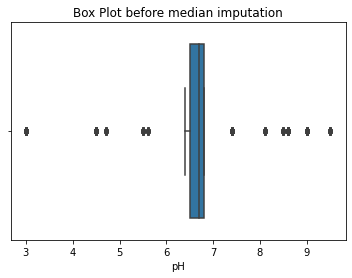

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


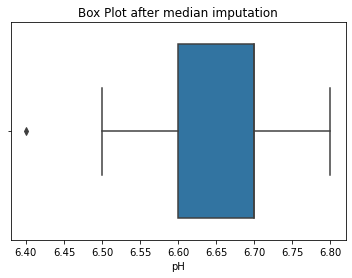

In [25]:
sns.boxplot(milk_df['pH'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = milk_df['pH'].quantile(0.25)
q3 = milk_df['pH'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(milk_df['pH'])
for i in milk_df['pH']:
    if i > Upper_tail or i < Lower_tail:
            milk_df['pH'] = milk_df['pH'].replace(i, med)
sns.boxplot(milk_df['pH'])
plt.title("Box Plot after median imputation")
plt.show() 

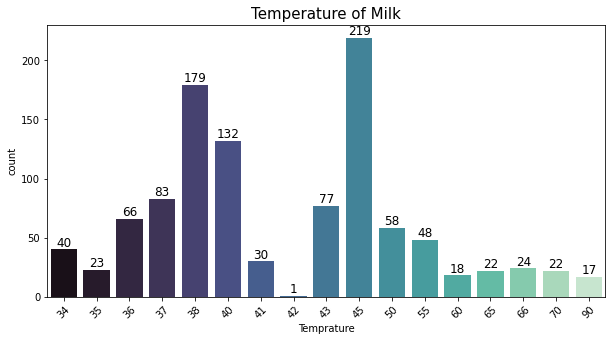

In [28]:
plt.figure(figsize=(10,5))
plt.title("Temperature of Milk",fontsize=15)
c1=sns.countplot(x='Temprature',data=milk_df,palette="mako")
c1.bar_label(c1.containers[0],size=12)
plt.xticks(rotation=45)
plt.show()

## Most milk is produced in under 50 degrees

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


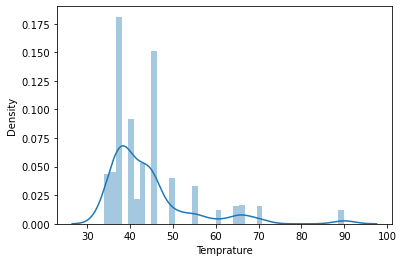

Skewness= 2.2167391370684855


In [33]:
sns.distplot(milk_df['Temprature'])
plt.show()
print("Skewness=",milk_df['Temprature'].skew())

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


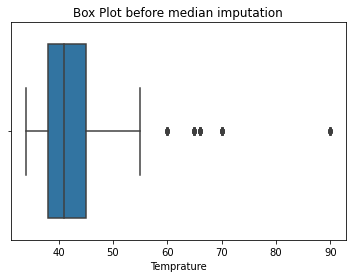

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


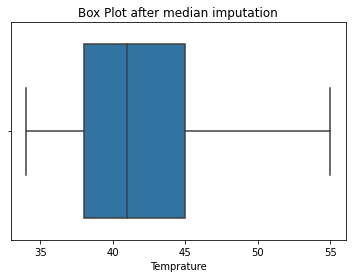

In [35]:
sns.boxplot(milk_df['Temprature'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = milk_df['Temprature'].quantile(0.25)
q3 = milk_df['Temprature'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(milk_df['Temprature'])
for i in milk_df['Temprature']:
    if i > Upper_tail or i < Lower_tail:
            milk_df['Temprature'] = milk_df['Temprature'].replace(i, med)
sns.boxplot(milk_df['Temprature'])
plt.title("Box Plot after median imputation")
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

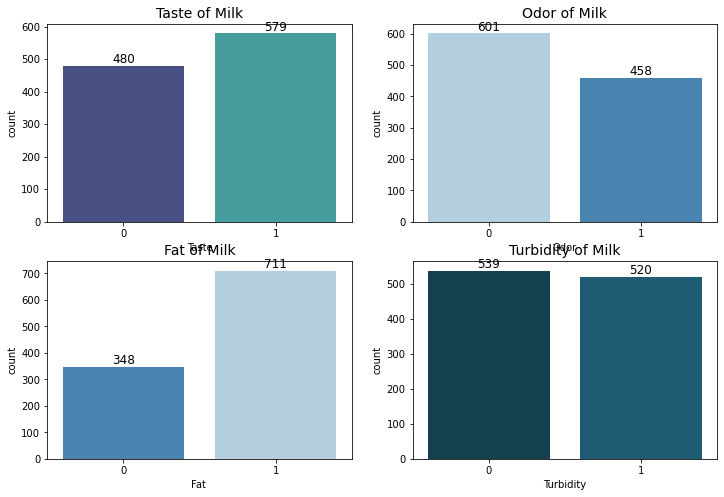

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

ax[0, 0].set_title("Taste of Milk",fontsize=14)
c1=sns.countplot(milk_df['Taste'],palette="mako",ax=ax[0][0])
c1.bar_label(c1.containers[0],size=12)

ax[0, 1].set_title("Odor of Milk",fontsize=14)
c2=sns.countplot(milk_df['Odor'],palette="Blues",ax=ax[0][1])
c2.bar_label(c2.containers[0],size=12)

ax[1, 0].set_title("Fat of Milk",fontsize=14)
c3=sns.countplot(milk_df['Fat '],palette="Blues_r",ax=ax[1][0])
c3.bar_label(c3.containers[0],size=12)

ax[1, 1].set_title("Turbidity of Milk",fontsize=14)
c4=sns.countplot(milk_df['Turbidity'],palette=['#0b445a','#0f6281'],ax=ax[1][1])
c4.bar_label(c4.containers[0],size=12)
plt.show()

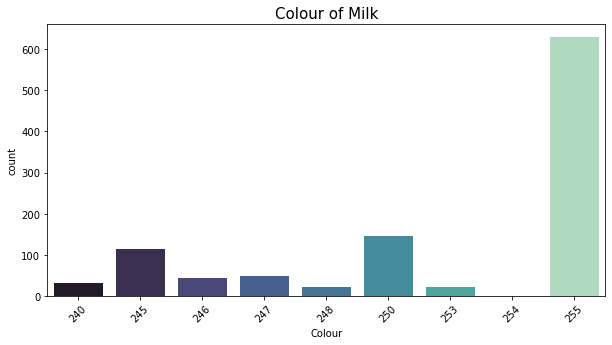

In [40]:
plt.figure(figsize=(10,5))
plt.title("Colour of Milk",fontsize=15)
c1=sns.countplot(x='Colour',data=milk_df,palette="mako")
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis:

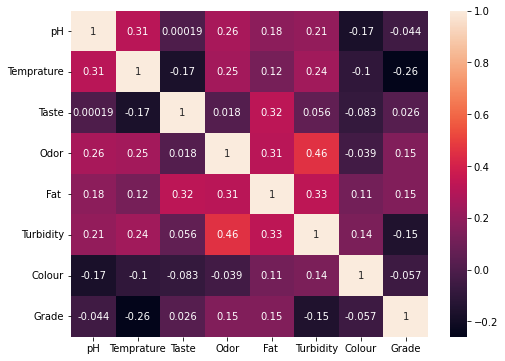

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(milk_df.corr(),annot=True)
plt.show()

## How Odor of Milk and Turbidity of it are connected?

In [43]:
pd.DataFrame(milk_df.groupby("Odor")["Turbidity"].mean())

,Turbidity
Odor,
0,0.291181
1,0.753275


## optimal Temperature at which major features of Milk are good?


In [45]:
pd.DataFrame(milk_df.groupby("Temprature")["Taste","Odor","Turbidity"].mean())

C:\Users\Bilal\AppData\Local\Temp\ipykernel_18760\1085685542.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(milk_df.groupby("Temprature")["Taste","Odor","Turbidity"].mean())


,Taste,Odor,Turbidity
Temprature,,,
34,0.600000,0.600000,1.000000
35,0.652174,0.347826,0.347826
36,0.000000,0.333333,0.015152
37,0.457831,0.289157,0.289157
38,0.692737,0.240223,0.240223
40,0.977273,0.530303,0.537879
41,0.375940,0.150376,0.451128
42,1.000000,1.000000,1.000000
43,0.974026,0.298701,0.922078


## Higher pH ensure we have better tasting milk?

In [46]:
pd.DataFrame(milk_df.groupby("pH")["Taste","Odor"].mean())

C:\Users\Bilal\AppData\Local\Temp\ipykernel_18760\107037312.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(milk_df.groupby("pH")["Taste","Odor"].mean())


,Taste,Odor
pH,,
6.4,0.000000,1.000000
6.5,0.518519,0.142857
6.6,0.383648,0.358491
6.7,0.698482,0.531453
6.8,0.393574,0.514056


## Having more fat content makes milk taste better

In [47]:
pd.DataFrame(milk_df.groupby('Fat ')['Taste'].mean())

,Taste
Fat,
0,0.316092
1,0.659634


# Comparing Features with Target Variable:

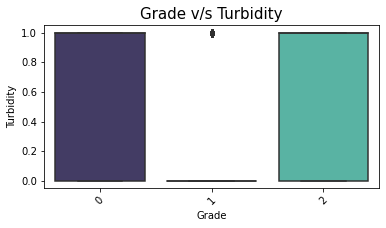

In [50]:
plt.figure(figsize = (6, 3))
plt.title('Grade v/s Turbidity',fontsize=15)
ax = sns.boxplot(x='Grade', y='Turbidity', data=milk_df,palette="mako")
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="g")
plt.xticks(rotation=45)
plt.show()

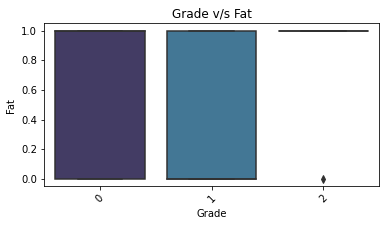

In [52]:
plt.figure(figsize = (6, 3))
plt.title('Grade v/s Fat')
ax = sns.boxplot(x='Grade', y='Fat ', data=milk_df,palette="mako")
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

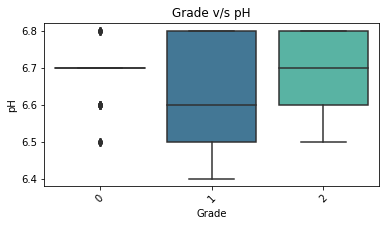

In [54]:
plt.figure(figsize = (6, 3))
plt.title('Grade v/s pH')
ax = sns.boxplot(x='Grade', y='pH', data=milk_df,palette="mako")
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="g")
plt.xticks(rotation=45)
plt.show()

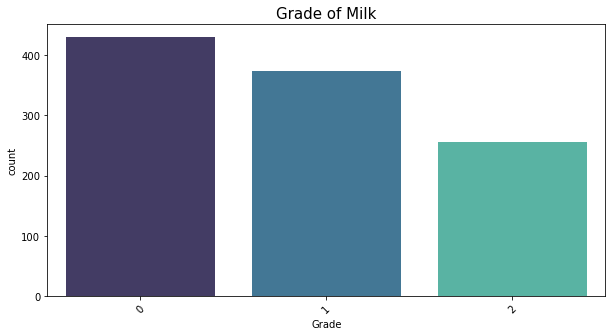

In [56]:
#Distribution of target variable
plt.figure(figsize=(10,5))
plt.title("Grade of Milk",fontsize=15)
c1=sns.countplot(x='Grade',data=milk_df,palette="mako")
plt.xticks(rotation=45)
plt.show()

In [57]:
# encoding the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
milk_df['Grade']= label_encoder.fit_transform(milk_df['Grade'])

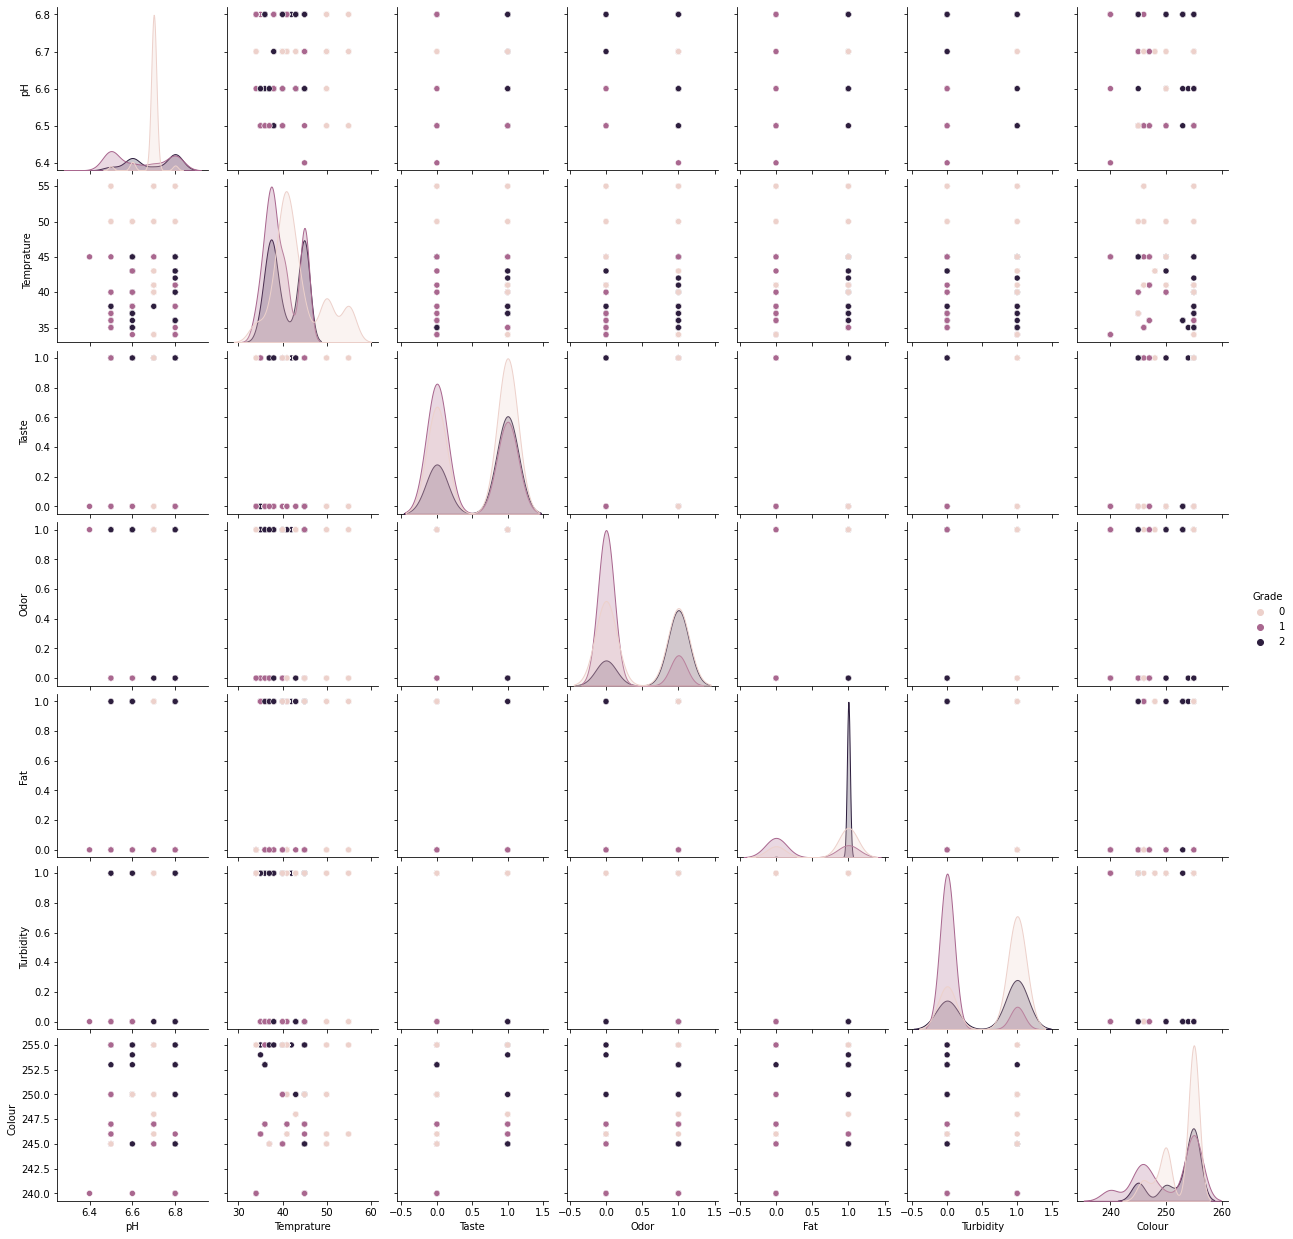

In [58]:
p = sns.pairplot(milk_df,hue="Grade")
plt.show()

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
x = milk_df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']].values
y = milk_df['Grade'].values

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [85]:
# defining the logistic regression model
lreg = LogisticRegression(solver='lbfgs', max_iter=2500)

In [86]:
# fitting the model on  X_train and y_train
lreg.fit(x_train,y_train)

LogisticRegression(max_iter=2500)

In [87]:
# making prediction on the validation set
prediction = lreg.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
# calculating the accuracy score
accuracy_score(y_test, prediction)

0.6257861635220126